# CRM Analytics: Customer Segmentation and Insights: RFM with K-Means Clustering

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #FFFFFF; font-size:130%; text-align:left">

<h2 align="left"><font color=#34e3af>Table of Contents:</font></h2>
    
* [Step 1 | Introduction](#introduction)
    - [Step 1.1 | Importing Necessary Libraries](#libraries) 
    - [Step 1.2 | Loading the Dataset](#read_dataset)
* [Step 2 | Exploratory Data Analysis](#eda) 
    - [Step 2.1 | Missing Values](#missing) 
    - [Step 2.2 | Removing Duplicated Values](#duplicated)
    - [Step 2.3 | Visualization](#visualize) 
* [Step 3 | CRM Analytics ](#crm_analytics)
    - [Step 3.1 | RFM Analysis](#rfm_analysis)
    - [Step 3.2 | Define RFM Metrics ](#rfm_metrics)
    - [Step 3.3 | Define Segmentation Map](#segment)
    - [Step 3.4 | Visualization](#visualization)
* [Step 4 | Customer Segmentation with K-Means](#cltv)
    - [Step 4.1 | Define BG-NBD Model Features](#bg_nbd)
    - [Step 4.2 | Define Gamma-Gamma Model](#gamma)
* [Step 5 | Customer Segmentation with K-Means](#kmeans)
    - [Step 5.1 | Create your model and segment your customers](#create_segment)
    - [Step 5.2 | Visualization](#visual_segment)
* [Step 6 | Conclusion](#conclusion)
</div>


<a id="introduction"></a>
# <b><span style='color:#09ba85'>Step 1 |</span><span style='color:#34e3af'> Introduction</span></b>
⬆️ [Tabel of Contents](#contents_tabel)


In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail). This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation.

By leveraging advanced CRM analytics, we aim to understand customer behavior, identify key segments, and tailor marketing efforts to enhance customer satisfaction and retention. This project will involve a comprehensive analysis including RFM (Recency, Frequency, Monetary) analysis, customer lifetime value prediction, and clustering techniques to provide actionable insights for data-driven decision making.


<a id="libraries"></a>
# <b><span style='color:#09ba85'>Step 1.1 |</span><span style='color:#34e3af'> Importing Necessary Libraries</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
!pip install squarify
!pip install tabulate
!pip install lifetimes

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

# Machine learning Tools
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
import os
import datetime
import squarify
import warnings
#import pandas as pd 
#import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette = 'Set2'

In [4]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<a id="read_dataset"></a>
# <b><span style='color:#09ba85'>Step 1.2 |</span><span style='color:#34e3af'> Reading Dataset</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [5]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
📃 Variable Description
    
- **InvoiceNo:** Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode:** Product code that consists 5 digits.
- **Description:** Product name.
- **Quantity:** The quantities of each product per transaction.
- **InvoiceDate:** Represents the day and time when each transaction was generated.
- **UnitPrice:** Product price per unit.
- **CustomerID:** Customer number that consists 5 digits. Each customer has a unique customer ID.
- **Country:** Name of the country where each customer resides.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


<a id="eda"></a>
# <b><span style='color:#09ba85'>Step 2 |</span><span style='color:#34e3af'> Exploratory Data Analysis</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [10]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 541909
Columns: 8
------------------------------- TYPES --------------------------------
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
-------------------------------- HEAD --------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8

In [11]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


<a id="missing"></a>
# <b><span style='color:#09ba85'>Step 2.1 |</span><span style='color:#34e3af'> Missing Values </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [13]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

missing_percentage.sort_values(ascending=True, inplace=True)

In [14]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

In [15]:
missing_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64

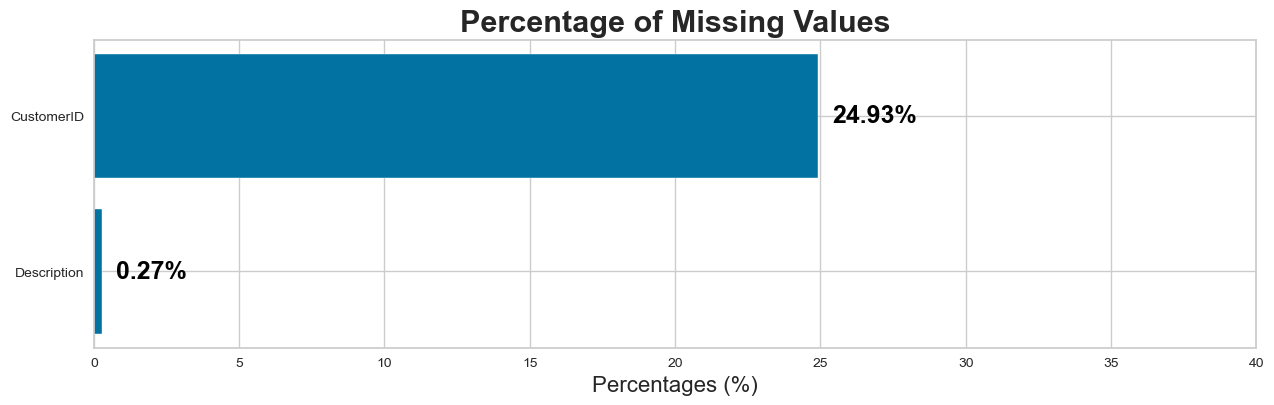

In [16]:
#%%
# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage)

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [17]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [18]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<a id="duplicated"></a>
# <b><span style='color:#09ba85'>Step 2.2 |</span><span style='color:#34e3af'> Removing Duplicated Values</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [20]:
df.duplicated().sum()

5225

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape[0]

401604

In [23]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


<a id="visualize"></a>
# <b><span style='color:#09ba85'>Step 2.3 |</span><span style='color:#34e3af'> Visualization</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

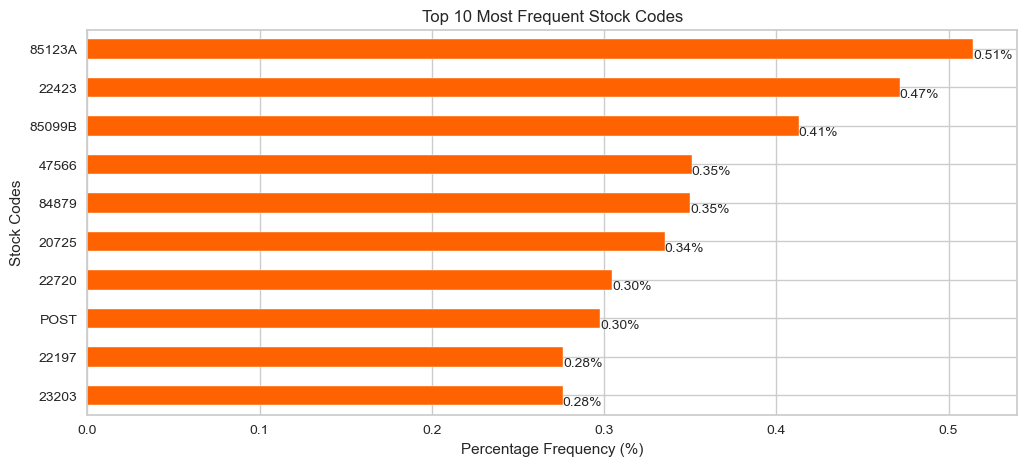

In [24]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

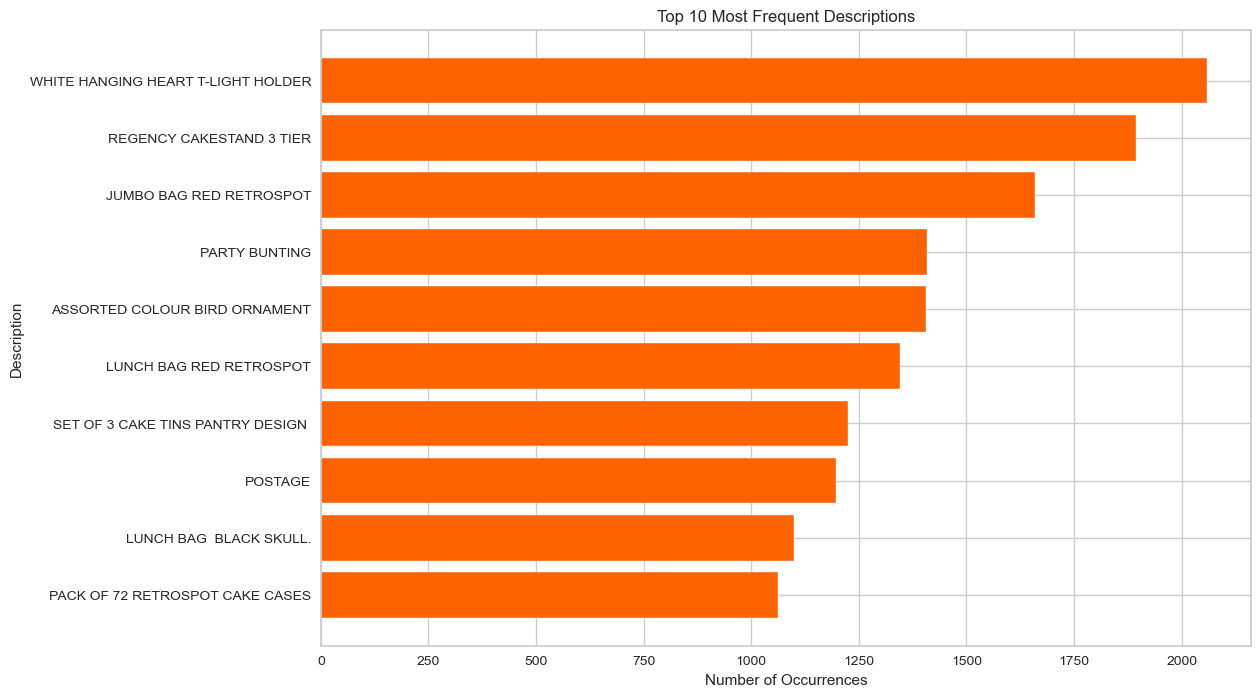

In [27]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_10_descriptions = description_counts[:10]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_10_descriptions.index[::-1], top_10_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 10 Most Frequent Descriptions')

# Show the plot
plt.show()

<a id="crm_analytics"></a>
# <b><span style='color:#09ba85'>Step 3 |</span><span style='color:#34e3af'> CRM Analytics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)


CRM analytics are data that demonstrate your company’s sales and customer service performance. CRM analytics also presents customer data that you can use to inform smarter business decisions. Typically, you’ll use CRM software to obtain CRM analytics and automate all your data collection and report generation.    
    
<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Benefits of CRM Analysis
    
The primary benefit of CRM analysis is that you can use it to inform your sales, customer service and marketing processes. You can use your CRM analytics to improve your methods via:

- **Customer service evaluations.** CRM analytics fill you in on your customer service team’s performance. If you see figures that your team could improve, implement practices that push your team toward these goals.
- **Accurate customer data.** Whether you’re using your customer data for demographic marketing or email marketing, you need to know whether you’re reaching the right person. CRM analysis ensures you’re doing just that.
- **Thorough customer analytics.** How much does your customer usually spend per quarter with you? Are they buying the same products time and time again, or does it vary? With CRM analytics, you’ll get firm answers to these questions, and you can use what you learn to refine your marketing strategies.
- **Efficient lead generation.** Your CRM analysis can tell you which of your marketing efforts most strongly correlate to purchases. If you see one approach correlating strongly to purchases but have only targeted a sliver of your customers with that approach, try that method more – your sales might increase.

<a id="rfm_analysis"></a>
# <b><span style='color:#09ba85'>Step 3.1 |</span><span style='color:#34e3af'> RFM Analysis </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

RFM stands for **Recency**, **Frequency**, and **Monetary** value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.   

RFM factors illustrate these facts:

- The more recent the purchase, the more responsive the customer is to promotions
- The more frequently the customer buys, the more engaged and satisfied they are
- Monetary value differentiates heavy spenders from low-value purchasers

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">

In [28]:
df["InvoiceDate"].max()
today_date = dt.datetime(2011,12,11)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [29]:
df["InvoiceNo"].nunique()

22190

In [30]:
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]

<a id="rfm_metrics"></a>
# <b><span style='color:#09ba85'>Step 3.2 |</span><span style='color:#34e3af'> Define RFM Metrics </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [31]:
# Recency today_date - InvoiceDate
# Frequency InvoiceNo.nunique()
# Monetary Quantity * UnitPrice


rfm = df.groupby('CustomerID').agg({ 'InvoiceDate' : lambda x : (today_date - x.max()).days,
                                    'InvoiceNo': lambda x : x.nunique(),
                                    'TotalPrice': lambda x : x.sum()
    
})

In [32]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [33]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [34]:
rfm.reset_index().head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [35]:
rfm["recency_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method='first'),5,labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])

In [36]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,326,2,0.00,1,2,1
12347.0,3,7,4310.00,5,4,5
12348.0,76,4,1797.24,2,3,4
12349.0,19,1,1757.55,4,1,4
12350.0,311,1,334.40,1,1,2


In [37]:
rfm["RFM_SCORE"] =rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)

In [38]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,326,2,0.00,1,2,1,12
12347.0,3,7,4310.00,5,4,5,54
12348.0,76,4,1797.24,2,3,4,23
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11


<a id="segment"></a>
# <b><span style='color:#09ba85'>Step 3.3 |</span><span style='color:#34e3af'> Define Segmentation Map </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [40]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

In [41]:
rfm["segment"] = rfm["RFM_SCORE"].replace(seg_map,regex=True)

In [42]:
rfm["segment"].value_counts()

segment
hibernating            1053
loyal_customers         795
champions               665
at_Risk                 603
potential_loyalists     490
about_to_sleep          369
need_attention          190
promising                97
cant_loose               68
new_customers            42
Name: count, dtype: int64

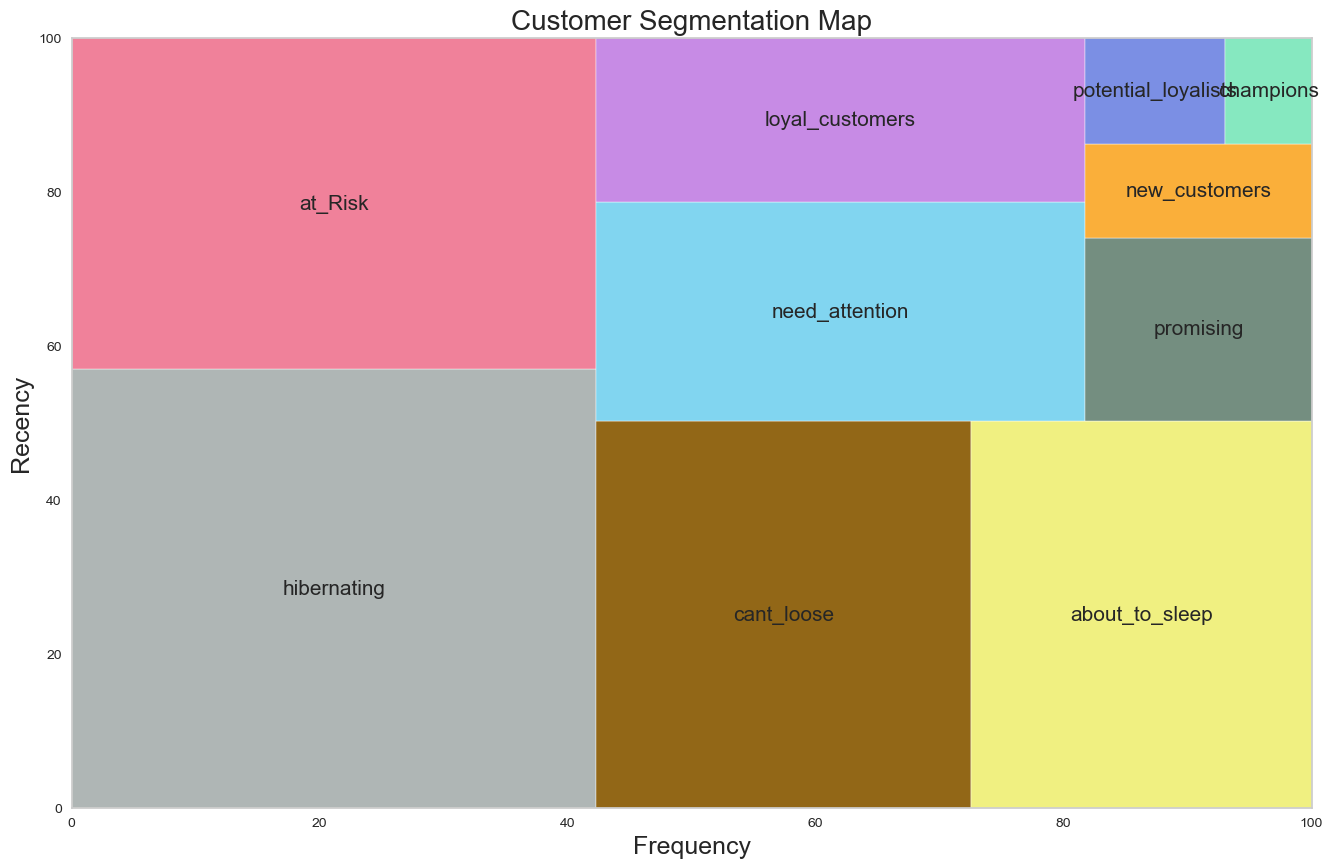

In [43]:
segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

By segmenting customers based on their RFM scores, we can develop targeted marketing strategies that address the specific needs and preferences of each segment. This approach not only improves customer satisfaction but also optimizes marketing expenditure by focusing resources on the most promising customer groups.

In [44]:
print(' RFM Model Evaluation '.center(70, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 4372
Number of Segments: 10
Silhouette Score: 0.47
Calinski Harabasz Score: 4634.948
Davies Bouldin Score: 0.637 


In [45]:
rfm.shape[0]

4372

In [46]:
rfm.shape[0]
#%%
rfm[['recency','monetary','frequency','segment']]\
.groupby('segment')\
.agg({'mean','count','max','min'})

recency                        monetary                   \
                        min count  max        mean      min count        max   
segment                                                                        
about_to_sleep           33   369   72   53.046070  -134.80   369    6207.67   
at_Risk                  73   603  373  158.653400  -840.76   603   21535.90   
cant_loose               73    68  313  134.088235   230.70    68   10217.48   
champions                 1   665   12    6.075188   151.23   665  279489.02   
hibernating              73  1053  374  218.221273 -4287.63  1053    7829.89   
loyal_customers          13   795   72   33.289308 -1165.30   795  123725.45   
need_attention           33   190   72   49.726316    -8.15   190    3541.94   
new_customers             1    42   12    7.238095    41.99    42    3861.00   
potential_loyalists       1   490   32   16.571429   -17.45   490   12393.70   
promising                13    97   32   23.103093     0.00    97    1757.55   

                                 frequency                        
                            mean       min count  max       mean  
segment                                                           
about_to_sleep        432.478808         1   369    2   1.289973  
at_Risk               947.906637         2   603    7   3.313433  
cant_loose           2373.597794         7    68   35   9.823529  
champions            6496.804782         4   665  248  14.590977  
hibernating           374.891720         1  1053    2   1.202279  
loyal_customers      2697.407888         4   795   76   7.991195  
need_attention        784.815316         2   190    4   2.636842  
new_customers         375.261905         1    42    1   1.000000  
potential_loyalists   678.297347         1   490    4   2.216327  
promising             300.261340         1    97    1   1.000000

<a id="visualization"></a>
# <b><span style='color:#09ba85'>Step 3.4 |</span><span style='color:#34e3af'> Visualization </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

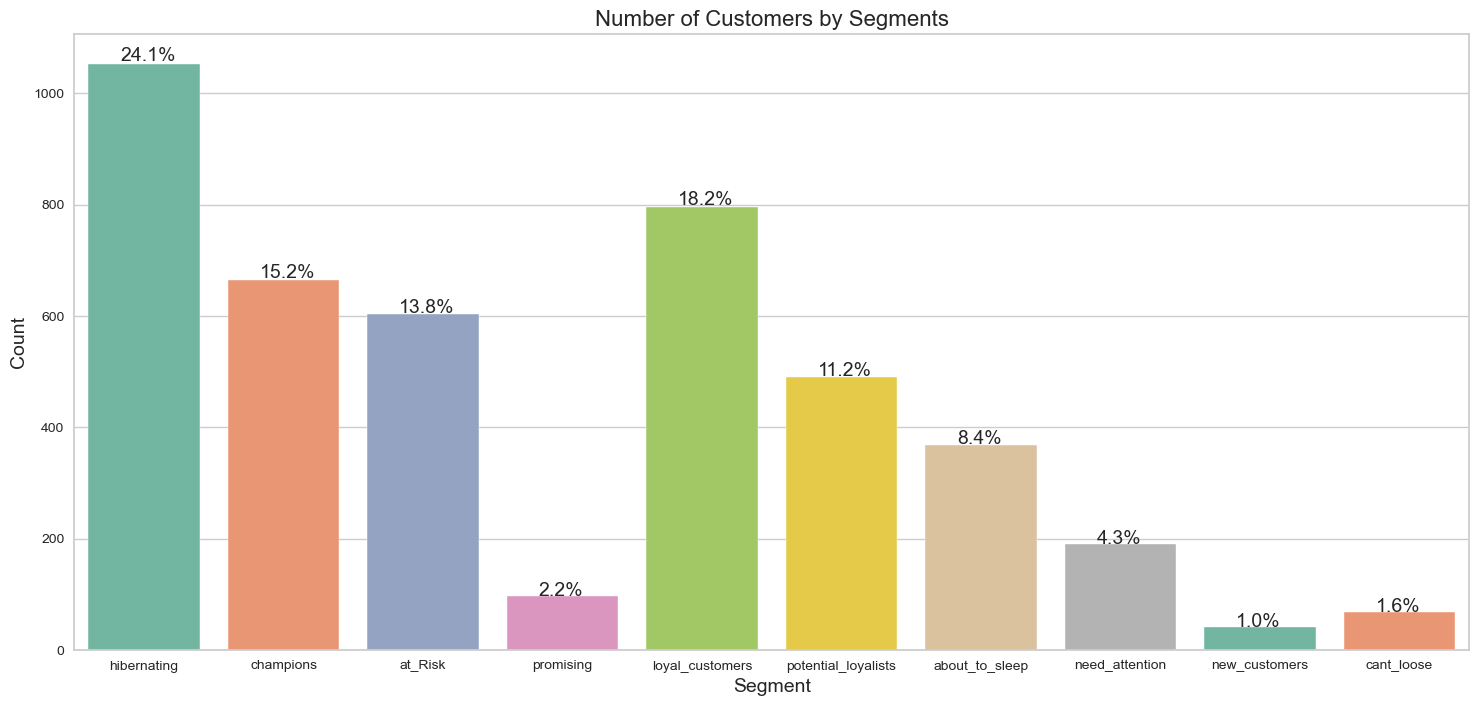

In [48]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

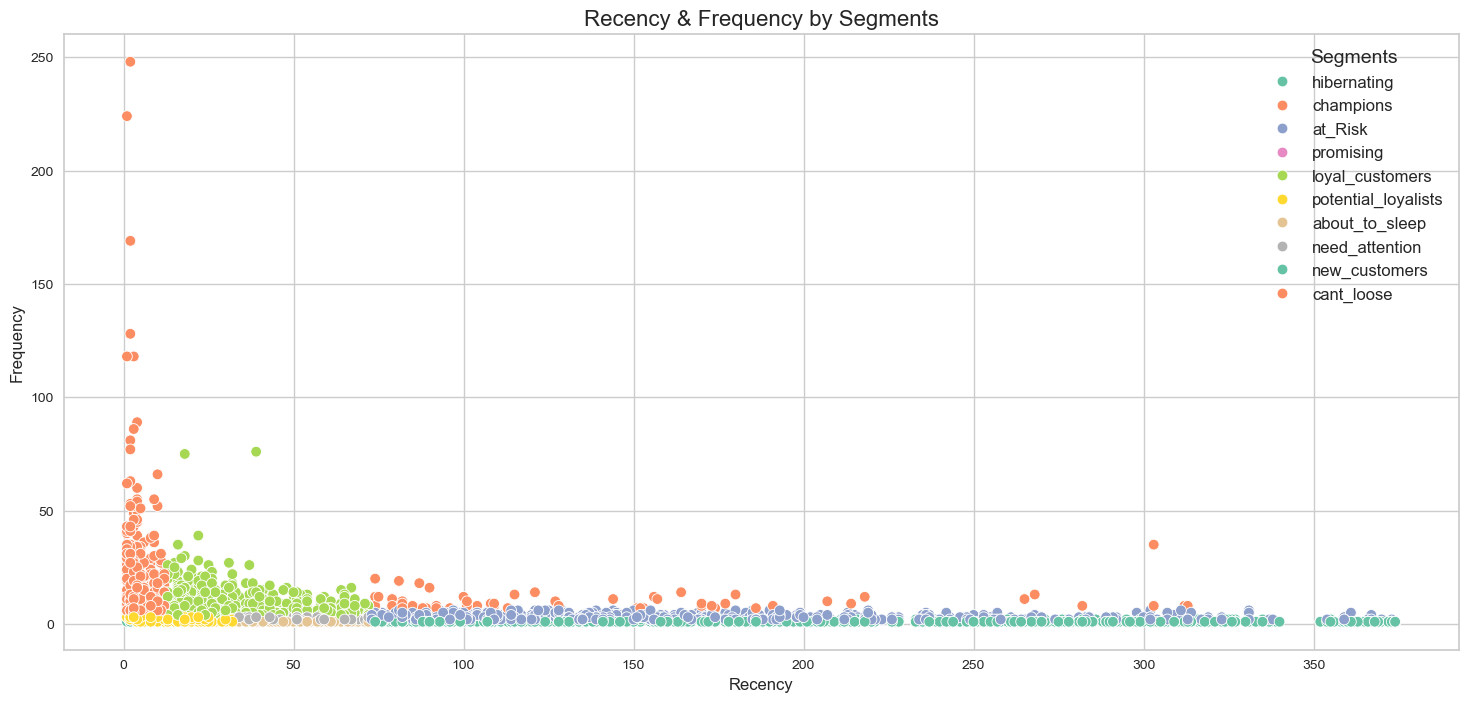

In [49]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", palette=palette, s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

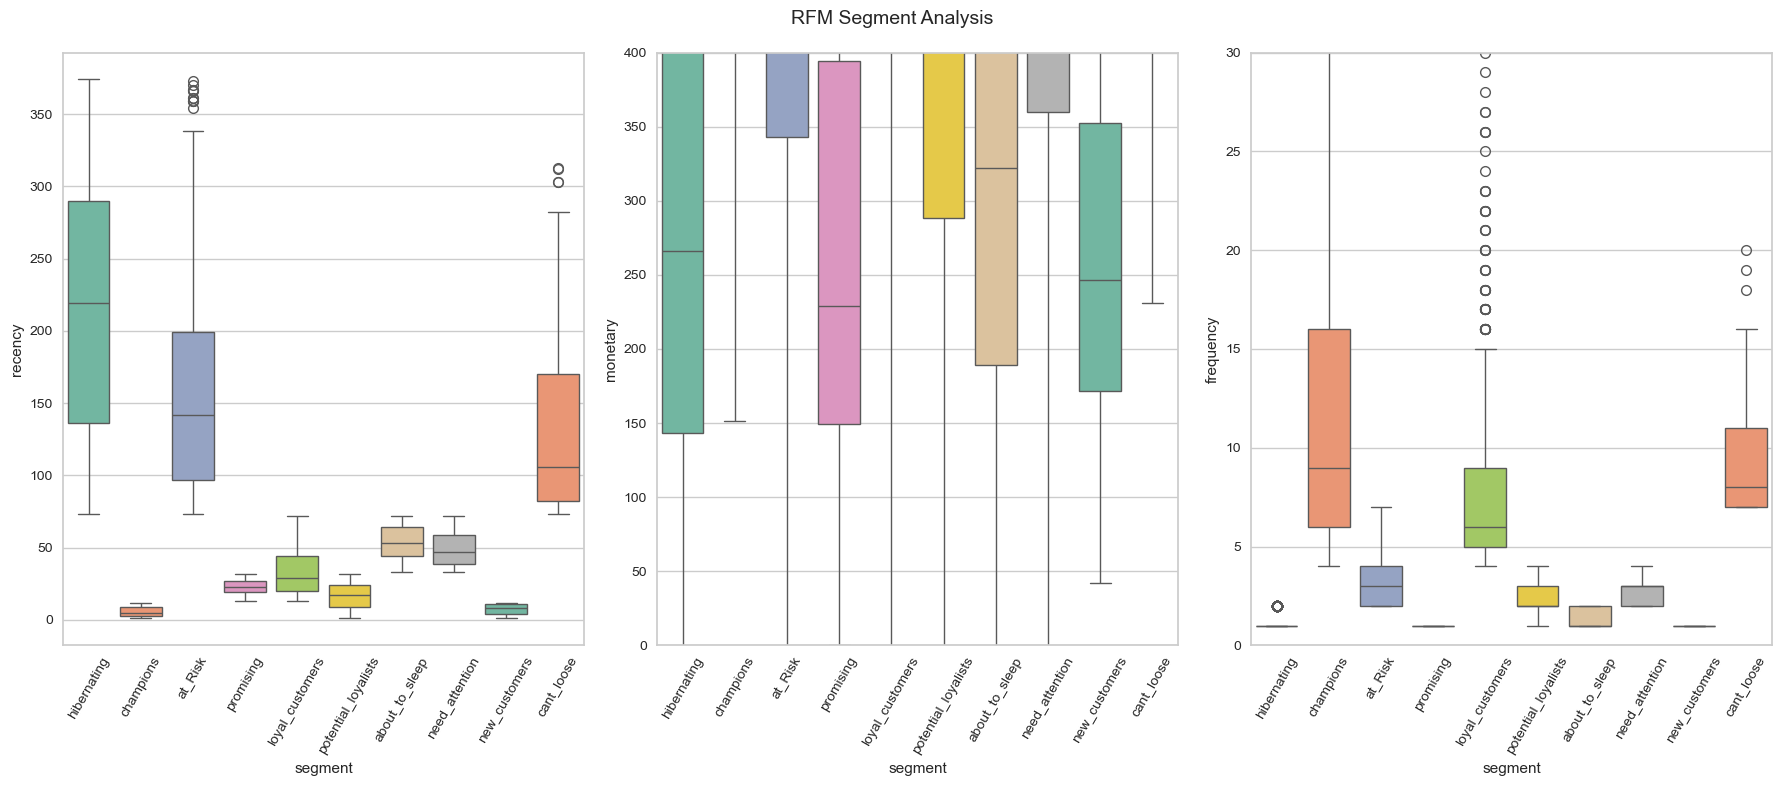

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

- **Personalized Marketing Campaigns:** Use RFM segments to create personalized marketing campaigns that cater to the unique preferences of each customer group.
- **Loyalty Programs:** Develop loyalty programs that reward frequent purchasers and high-value customers to foster long-term loyalty and increase customer retention.
- **Promotional Strategies:** Design timely and relevant promotional strategies for customers who have recently interacted with the brand to boost engagement and conversion rates.

<a id="cltv"></a>
# <b><span style='color:#09ba85'>Step 4 |</span><span style='color:#34e3af'> Customer Lifetime Value </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

Customer Lifetime Value (CLTV) analysis is crucial for estimating the total value customers bring to a business, guiding strategic decision-making. In this project, CLTV analysis has deepened our understanding of customer segmentation and helped us optimize future revenue potential. 

In [52]:
# today date- inovoicedate.min()

cltv_df = df.groupby("CustomerID").agg(
    {
        "InvoiceDate": [
            lambda x: (x.max() - x.min()).days,
            lambda x: (today_date - x.min()).days,
        ],
        "InvoiceNo": "nunique",
        "TotalPrice": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

In [54]:
#Average Order Value
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

<a id="bg_nbd"></a>
# <b><span style='color:#09ba85'>Step 4.1 |</span><span style='color:#34e3af'> Define BG-NBD Model </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [57]:
BGF = BetaGeoFitter(penalizer_coef=0.001)  # avoid overfitting

BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 3059 subjects, a: 0.19, alpha: 7.64, b: 2.81, r: 1.90>

In [58]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    #week
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,CustomerID,Expected Number of Transactions
0,14911.0,4.075695
1,12748.0,3.684372
2,17841.0,2.783695
3,14606.0,2.118042
4,13089.0,1.968899
5,15311.0,1.956164
6,14096.0,1.581828
7,12971.0,1.480437
8,14527.0,1.431272
9,13408.0,1.349724


In [59]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,CustomerID,Expected Number of Transactions
0,14911.0,16.227443
1,12748.0,14.669388
2,17841.0,11.083334
3,14606.0,8.433031
4,13089.0,7.838886
5,15311.0,7.788514
6,14096.0,6.251014
7,12971.0,5.894339
8,14527.0,5.698653
9,13408.0,5.373966


<a id="gamma"></a>
# <b><span style='color:#09ba85'>Step 4.2 |</span><span style='color:#34e3af'> Define Gamma-Gamma Model </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [61]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

In [62]:
cltv_df = cltv_df[cltv_df['monetary'] > 0]

In [63]:
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 3040 subjects, p: 1.81, q: 0.29, v: 3.49>

In [64]:
# Expected average profit

cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])

In [65]:
cltv_df["clv"] = ggf.customer_lifetime_value(BGF,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=3,  
                                   freq="W", 
                                   discount_rate=0.01)

In [66]:
cltv_df = cltv_df.reset_index()
cltv_df.head()

,CustomerID,recency,T,frequency,monetary,expected_average_profit,clv
0,12347.0,52.142857,52.571429,7,615.714286,652.988402,1181.689889
1,12348.0,40.285714,51.285714,4,449.310000,499.402782,562.690488
2,12352.0,37.142857,42.428571,11,140.491818,146.043373,441.622485
3,12356.0,43.142857,46.571429,3,937.143333,1080.264246,1156.595688
4,12358.0,21.285714,21.571429,2,584.030000,729.588306,1138.471261


In [67]:
cltv_df["cltv_segment"] = pd.qcut(cltv_df["clv"], 4, labels=["D", "C", "B", "A"])

In [68]:
cltv_df.groupby("cltv_segment").agg({"count", "mean", "sum"})

CustomerID                           recency                   \
                     sum count          mean           sum count       mean   
cltv_segment                                                                  
D             11717537.0   760  15417.811842  13533.857143   760  17.807707   
C             11678421.0   760  15366.343421  23178.428571   760  30.497932   
B             11665991.0   760  15349.988158  23258.857143   760  30.603759   
A             11385689.0   760  14981.169737  23113.428571   760  30.412406   

                         T                  frequency  ...             \
                       sum count       mean       sum  ...       mean   
cltv_segment                                           ...              
D             30239.142857   760  39.788346      2523  ...   3.319737   
C             28538.857143   760  37.551128      3416  ...   4.494737   
B             26997.142857   760  35.522556      4878  ...   6.418421   
A             25256.000000   760  33.231579     10011  ...  13.172368   

                   monetary                   expected_average_profit        \
                        sum count        mean                     sum count   
cltv_segment                                                                  
D             126402.323301   760  166.318846           150750.130300   760   
C             169293.164326   760  222.754164           195095.520337   760   
B             233057.923078   760  306.655162           260654.362406   760   
A             415555.907136   760  546.784088           453578.273413   760   

                                   clv                     
                    mean           sum count         mean  
cltv_segment                                               
D             198.355435  7.082652e+04   760    93.192783  
C             256.704632  2.568397e+05   760   337.947007  
B             342.966266  4.943783e+05   760   650.497708  
A             596.813518  1.737177e+06   760  2285.759752  

[4 rows x 21 columns]

In this project, we identified four customer segments (A, B, C, and D) based on the CLTV analysis. Here are the insights and recommendations for each segment:

**Segment A: High Value, High Engagement**

Characteristics:
- **High Recency:** Recent purchases.
- **High Frequency:** Frequent purchases.
- **High Monetary Value:** High spending.

**Segment B: Moderate Value, Moderate Engagement**

Characteristics:
- **Moderate Recency:** Fairly recent purchases.
- **Moderate Frequency:** Moderate purchase frequency.
- **Moderate Monetary Value:** Moderate spending.


**Segment C: Low Value, Low Engagement**

Characteristics:
- **Low Recency:** Less recent purchases.
- **Low Frequency:** Infrequent purchases.
- **Low Monetary Value:** Low spending.


**Segment D: New Customers**

Characteristics:
- **Recent Acquisition:** Newly acquired customers.
- **Undefined Frequency and Monetary Value:** Insufficient data to determine patterns.



## Merge Dataset

In [70]:
cltv_df.head()

,CustomerID,recency,T,frequency,monetary,expected_average_profit,clv,cltv_segment
0,12347.0,52.142857,52.571429,7,615.714286,652.988402,1181.689889,A
1,12348.0,40.285714,51.285714,4,449.310000,499.402782,562.690488,B
2,12352.0,37.142857,42.428571,11,140.491818,146.043373,441.622485,C
3,12356.0,43.142857,46.571429,3,937.143333,1080.264246,1156.595688,A
4,12358.0,21.285714,21.571429,2,584.030000,729.588306,1138.471261,A


In [71]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,2,1,12,hibernating
12347.0,3,7,4310.00,5,4,5,54,champions
12348.0,76,4,1797.24,2,3,4,23,at_Risk
12349.0,19,1,1757.55,4,1,4,41,promising
12350.0,311,1,334.40,1,1,2,11,hibernating


In [72]:
merged_df = pd.merge(cltv_df, rfm, on='CustomerID', how='inner')
merged_df.head(10)

,CustomerID,recency_x,T,frequency_x,monetary_x,expected_average_profit,clv,cltv_segment,recency_y,frequency_y,monetary_y,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12347.0,52.142857,52.571429,7,615.714286,652.988402,1181.689889,A,3,7,4310.00,5,4,5,54,champions
1,12348.0,40.285714,51.285714,4,449.310000,499.402782,562.690488,B,76,4,1797.24,2,3,4,23,at_Risk
2,12352.0,37.142857,42.428571,11,140.491818,146.043373,441.622485,C,37,11,1545.41,3,5,4,35,loyal_customers
3,12356.0,43.142857,46.571429,3,937.143333,1080.264246,1156.595688,A,23,3,2811.43,4,3,5,43,potential_loyalists
4,12358.0,21.285714,21.571429,2,584.030000,729.588306,1138.471261,A,2,2,1168.06,5,2,4,52,potential_loyalists
5,12359.0,46.142857,47.428571,6,1030.496667,1103.589714,1922.848873,A,8,6,6182.98,5,4,5,54,champions
6,12360.0,21.142857,28.714286,3,887.353333,1022.941512,1516.073454,A,53,3,2662.06,3,3,5,33,need_attention
7,12362.0,41.714286,42.285714,13,396.506154,409.183397,1501.366419,A,4,13,5154.58,5,5,5,55,champions
8,12363.0,18.857143,34.714286,2,276.000000,345.934936,300.826348,C,110,2,552.00,2,2,3,22,hibernating
9,12364.0,14.857143,16.142857,4,328.275000,365.134741,1057.763799,A,8,4,1313.10,5,3,4,53,potential_loyalists


In [73]:
filtered_df = merged_df[(merged_df['cltv_segment'] == 'A') & (merged_df['segment'].isin(['need_attention','at_Risk']))]

In [74]:
from IPython.display import display
display(filtered_df)

,CustomerID,recency_x,T,frequency_x,monetary_x,expected_average_profit,clv,cltv_segment,recency_y,frequency_y,monetary_y,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
6,12360.0,21.142857,28.714286,3,887.353333,1022.941512,1516.073454,A,53,3,2662.06,3,3,5,33,need_attention
11,12370.0,44.142857,51.571429,4,885.485000,983.265821,1142.999939,A,52,4,3541.94,3,3,5,33,need_attention
32,12409.0,14.714286,26.142857,7,1579.561429,1674.357225,2919.462408,A,79,7,11056.93,2,4,5,24,at_Risk
88,12502.0,30.571429,44.285714,5,744.774000,809.280711,1086.876109,A,96,5,3723.87,2,4,5,24,at_Risk
113,12546.0,4.428571,11.142857,3,380.500000,439.406285,1025.850535,A,47,3,1141.50,3,3,4,33,need_attention
372,13027.0,34.285714,50.714286,6,1152.000000,1233.637804,1562.918390,A,114,6,6912.00,2,4,5,24,at_Risk
376,13032.0,6.857143,12.571429,3,332.173333,383.768272,936.962574,A,39,3,996.52,3,3,4,33,need_attention
422,13124.0,38.428571,51.428571,3,1252.110000,1442.882252,1319.248287,A,90,3,3756.33,2,3,5,23,at_Risk
472,13224.0,13.000000,21.714286,3,716.950000,826.757841,1385.205181,A,61,3,2150.85,3,3,5,33,need_attention
530,13334.0,31.857143,43.714286,3,1167.440000,1345.402519,1399.227256,A,83,3,3502.32,2,3,5,23,at_Risk


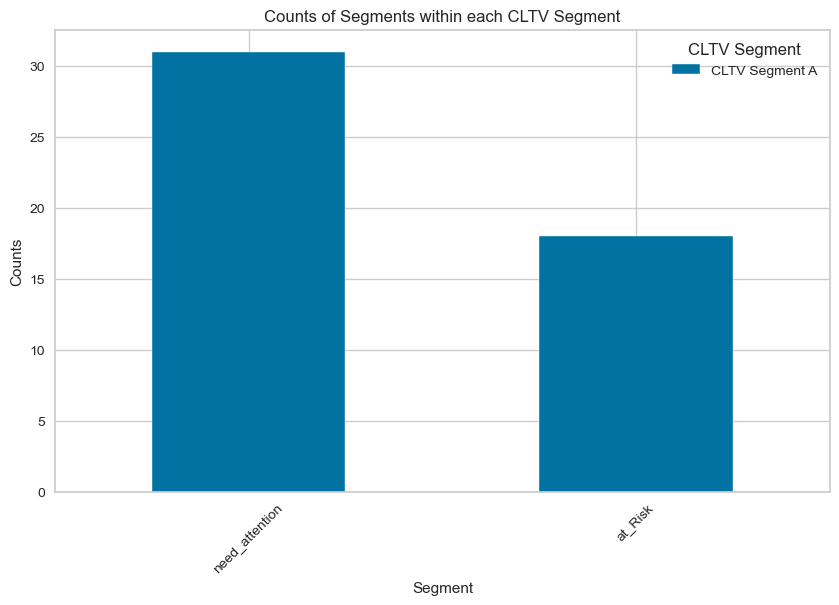

In [75]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Count plot for each cltv_segment
for cltv_segment in filtered_df['cltv_segment'].unique():
    subset = filtered_df[filtered_df['cltv_segment'] == cltv_segment]
    segment_counts = subset['segment'].value_counts()
    segment_counts.plot(kind='bar', ax=ax, label=f'CLTV Segment {cltv_segment}')

# Adding labels and title
ax.set_xlabel('Segment')
ax.set_ylabel('Counts')
ax.set_title('Counts of Segments within each CLTV Segment')
ax.legend(title='CLTV Segment')

# Display the plot
plt.xticks(rotation=45)
plt.show()

<a id="kmeans"></a>
# <b><span style='color:#09ba85'>Step 5 |</span><span style='color:#34e3af'> Customer Segmentation with K-Means </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [77]:
rfm_features = rfm[['recency', 'frequency', 'monetary']]

In [78]:
# Scale variables
sc = MinMaxScaler((0, 1))
rfm_features = sc.fit_transform(rfm_features)

In [79]:
rfm_features

array([[0.87131367, 0.00404858, 0.01510917],
       [0.00536193, 0.0242915 , 0.03029717],
       [0.20107239, 0.01214575, 0.02144246],
       ...,
       [0.01876676, 0.00809717, 0.01573149],
       [0.0080429 , 0.06072874, 0.02231741],
       [0.11260054, 0.00809717, 0.02158356]])

## Determine the optimal number of clusters

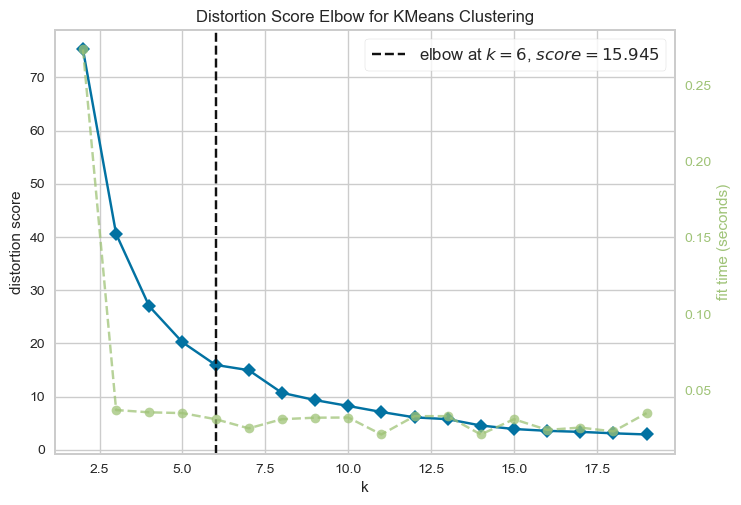

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(rfm_features)
elbow.show(block=True)

In [82]:
elbow.elbow_value_

6

<a id="create_segment"></a>
# <b><span style='color:#09ba85'>Step 5.1 |</span><span style='color:#34e3af'> Create your model and segment your customers </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

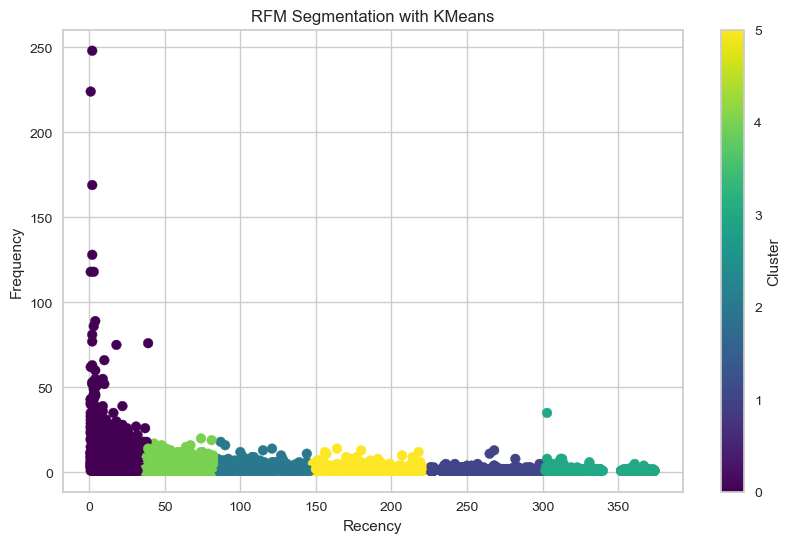

In [83]:
# KMeans ile segmentasyon
kmeans = KMeans(n_clusters=elbow.elbow_value_)
rfm['cluster'] = kmeans.fit_predict(rfm_features)

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(rfm['recency'], rfm['frequency'], c=rfm['cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Segmentation with KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [84]:
rfm_clusters_kmeans = kmeans.labels_

In [85]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment,cluster
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,2,1,12,hibernating,3
12347.0,3,7,4310.00,5,4,5,54,champions,0
12348.0,76,4,1797.24,2,3,4,23,at_Risk,4
12349.0,19,1,1757.55,4,1,4,41,promising,0
12350.0,311,1,334.40,1,1,2,11,hibernating,3


In [86]:
rfm[['recency','monetary','frequency','cluster']]\
.groupby('cluster')\
.agg({'count','std','max','min'})

recency                      monetary                            \
               std  min count  max           std      min count        max   
cluster                                                                      
0        10.016076    1  1849   39  12403.079887   -17.45  1849  279489.02   
1        20.437196  223   355  300   1267.649164   -95.93   355   21535.90   
2        18.439155   85   461  146   1087.677849 -4287.63   461   10217.48   
3        25.475603  302   281  374    519.865807 -1192.20   281    5303.48   
4        13.617006   36   989   83   1381.389449 -1165.30   989   17588.26   
5        21.926509  148   437  221    829.477165  -141.48   437    9861.38   

         frequency                 
               std min count  max  
cluster                            
0        13.367759   1  1849  248  
1         1.187653   1   355   13  
2         2.284481   1   461   18  
3         2.279788   1   281   35  
4         2.900984   1   989   20  
5         1.899176   1   437   14

<a id="visual_segment"></a>
# <b><span style='color:#09ba85'>Step 5.2 |</span><span style='color:#34e3af'> Visualization </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

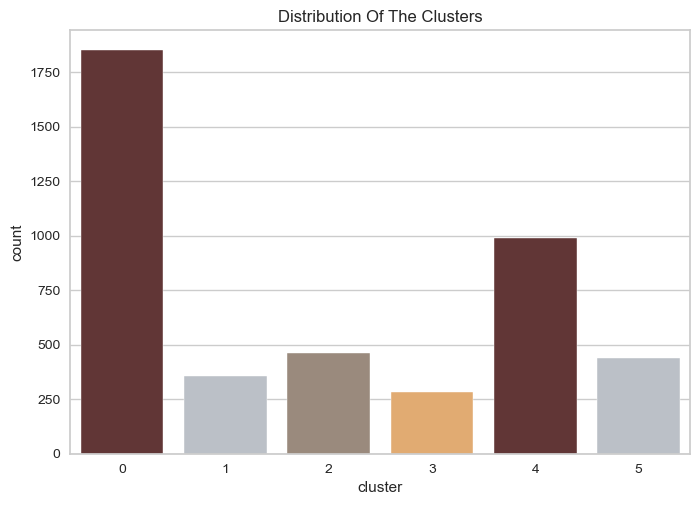

In [87]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=rfm["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

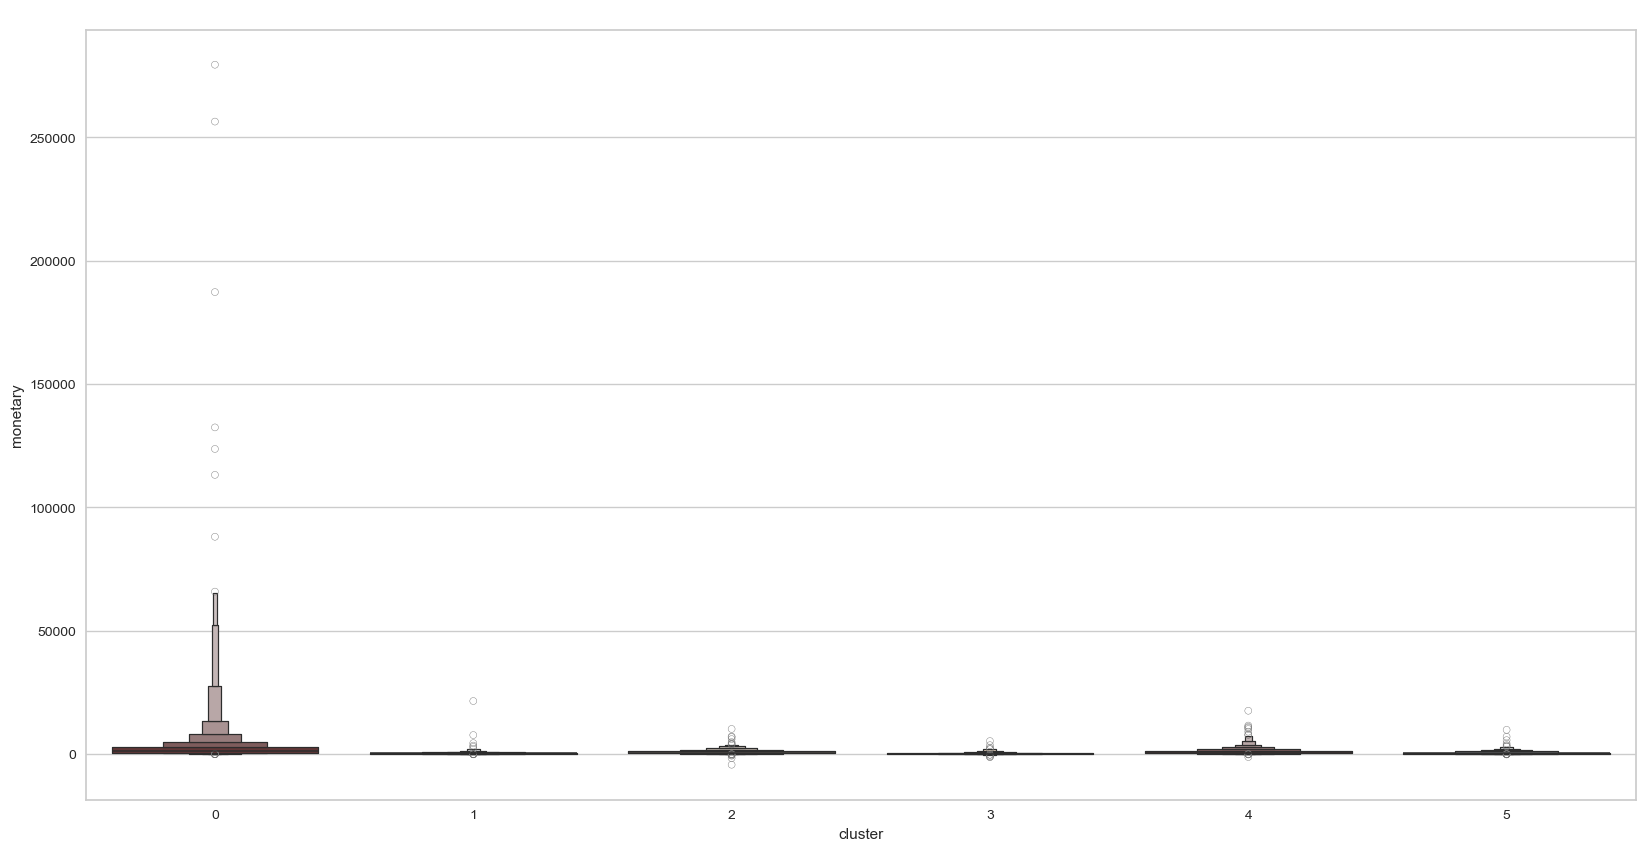

In [88]:
plt.figure(figsize=(20, 10))
pl=sns.boxenplot(y=rfm["monetary"],x=rfm["cluster"], palette= pal)
pl.set_title("  ")
plt.show()

<a id="conclusion"></a>
# <b><span style='color:#09ba85'>Step 6 |</span><span style='color:#34e3af'> Conclusion </span></b>
⬆️ [Tabel of Contents](#contents_tabel)

This project has provided a comprehensive analysis of customer behavior through the lens of CRM analytics, focusing on customer segmentation, RFM analysis, and Customer Lifetime Value (CLTV) estimation. Here are the key takeaways and their implications for future strategic decisions:

1. **Customer Segmentation:**
   - The segmentation process revealed four distinct customer segments (A, B, C, D) with varying levels of value and engagement.
   - Segment A consists of high-value, highly engaged customers who contribute significantly to the business's revenue and require personalized strategies to maintain their loyalty.
   - Segment B includes moderately valuable customers with the potential for growth through targeted marketing efforts.
   - Segment C contains low-value, low-engagement customers who are at risk of churning but can be reactivated with specialized campaigns.
   - Segment D represents new customers, highlighting the need for effective onboarding and nurturing strategies to convert them into loyal clients.

2. **RFM Analysis:**
   - RFM analysis provided deep insights into customer purchasing behavior, revealing the importance of recent, frequent, and high-value transactions.
   - These insights guided the development of targeted marketing strategies, ensuring that resources are allocated efficiently to maximize ROI.

3. **CLTV Estimation:**
   - CLTV analysis emphasized the long-term value of customers, helping to prioritize high-potential segments.
   - The analysis supports strategic planning and resource allocation by identifying customers who are likely to contribute the most to future revenue.
